After the catastrophic crypto market crash, ignited by UST Terra's failure to maintain its dollar pegging, we aim to find correlations and clustering amongst all StableCoins and defi farm Tokens.

Here is the list of stablecoins ranked by MC https://coinmarketcap.com/view/stablecoin/
And the of Defi Token ranked by MC https://coinmarketcap.com/view/defi/

In [5]:
from cryptocmd import CmcScraper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn import cluster, covariance, manifold
symbol_dict = {
    "USDT":"Tether",
    "USDC":"USD Coin(base)",
    "BUSD":"Binance USD",
    "DAI":"DAI Maker",
    "UST":"TERRA",
    "TUSD":"TrueUSD",
    "USDP":"PAX Dollar",
    "USDN":"Neutrino USD",
    "FEI":"Fei USD",
    "GUSD":"Gemini USD",
    "USDD":"USDD",

    "AVAX":"Avalanche",
    "WBTC":"Wrapped BTC",
    "UNI":"Uniswap",
    "LINK":"ChainLink",
    "XTZ":"Tezos",
    "MKR":"Maker",
    "THETA":"Theta Network",
    "CAKE":"Pancake Swap",
    "GRT":"The Graph",
    "AAVE":"Aave",
    "RUNE":"ThorChain",
    "FTM":"Fantom",
    "CVX":"Convex Finance",
    "STX":"Stacks",
    "LRC":"Loopring",
    "CRV":"CurveDao",
    "BAT":"Basic Attention Token",
    "COMP":"Compound",
    "LDO":"Lido DAO",
    "KAVA":"Kava",
    "1INCH":"1inch",
    "YFI":"Yearn Finance",
    "ZRX":"0x"
}

In [8]:
def load_fresh_data_and_save_to_disc(symbol_dict, save_path):
    symbols, names = np.array(sorted(symbol_dict.items())).T
    for symbol in symbols:
        scraper = CmcScraper(symbol)

        df_coin_prices = scraper.get_dataframe()
        df = pd.DataFrame()
        print(f' Fetching prices for {symbol}')

        df[symbol + '_Open'] = df_coin_prices['Open']
        df[symbol + '_Close'] = df_coin_prices['Close']
        df[symbol + '_Avg'] = (df_coin_prices['Close'] + df_coin_prices['Open']) / 2

        df[symbol + '_p'] = (df_coin_prices['Open'] - df_coin_prices['Close']) / df_coin_prices['Open']

        if symbol == symbols[0]:
            df_crypto = df.copy()
        else:
            df_crypto = pd.merge(
                left = df_crypto, right = df , how = 'outer',
                left_index = True, right_index = True)

        filter_columns = [s for s in df_crypto.columns if '_p' in s]
        X_df_filtered = df_crypto[filter_columns].copy()
    X_df_filtered.to_csv(save_path + 'historical_crypto_prices.csv')
    return names, symbols, X_df_filtered
save_path = ''

new_data = True
if new_data == False:
    try:
        print('loading from disk')
        X_df_filtered = pd.read_csv(save_path + 'historical_crypto_prices.csv')
        if 'Unnamed: 0' in X_df_filtered.columns:
            X_df_filtered = X_df_filtered.drop(['Unnamed: 0'], axis = 1)
            symbols, names = np.array(sorted(symbol_dict.items())).T
        print(list(X_df_filtered))
    except:
        print("No existing price data found - loading fresh data from CMC then saving locally")
        names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
        print(list(symbols))
else:
    print('loading fresh data from CMC and saving locally')
    names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
    print(list(symbols))

t = 100 #number of days we collect data 

X_df_filtered = X_df_filtered[:t]
X_df_filtered.head()


loading fresh data from CMC and saving locally
 Fetching prices for 1INCH
 Fetching prices for AAVE
 Fetching prices for AVAX
 Fetching prices for BAT
 Fetching prices for BUSD
 Fetching prices for CAKE
 Fetching prices for COMP
 Fetching prices for CRV
 Fetching prices for CVX
 Fetching prices for DAI
 Fetching prices for FEI
 Fetching prices for FTM
 Fetching prices for GRT
 Fetching prices for GUSD
 Fetching prices for KAVA
 Fetching prices for LDO
 Fetching prices for LINK
 Fetching prices for LRC
 Fetching prices for MKR
 Fetching prices for RUNE
 Fetching prices for STX
 Fetching prices for THETA
 Fetching prices for TUSD
 Fetching prices for UNI
 Fetching prices for USDC
 Fetching prices for USDD
 Fetching prices for USDN
 Fetching prices for USDP
 Fetching prices for USDT
 Fetching prices for UST
 Fetching prices for WBTC
 Fetching prices for XTZ
 Fetching prices for YFI
 Fetching prices for ZRX
['1INCH', 'AAVE', 'AVAX', 'BAT', 'BUSD', 'CAKE', 'COMP', 'CRV', 'CVX', 'DAI', 'FEI'

,1INCH_p,AAVE_p,AVAX_p,BAT_p,BUSD_p,CAKE_p,COMP_p,CRV_p,CVX_p,DAI_p,...,USDC_p,USDD_p,USDN_p,USDP_p,USDT_p,UST_p,WBTC_p,XTZ_p,YFI_p,ZRX_p
0,-0.136555,-0.061900,-0.059258,-0.072590,0.002325,-0.116246,-0.117644,-0.010262,-0.091188,0.001354,...,0.000255,-0.003472,-0.064172,0.001441,-0.000714,0.620254,-0.007360,-0.054234,0.000440,-0.097677
1,0.209830,0.053349,0.020007,0.034164,-0.000669,0.086655,0.110152,0.121570,0.171177,0.000239,...,0.000118,-0.002898,-0.082070,0.000767,-0.001737,0.489945,-0.006531,0.055933,0.125382,0.125018
2,0.017413,0.222481,0.304547,0.203706,-0.003383,0.271441,0.220393,0.250179,0.336209,-0.001342,...,-0.000981,0.005670,0.135969,-0.001712,0.003919,-0.002208,0.069480,0.159810,0.173042,0.245422
3,-0.013677,-0.045389,-0.063957,-0.039065,0.001099,-0.031095,-0.099389,-0.029396,-0.090331,-0.001146,...,-0.000253,0.000184,0.018095,-0.002341,0.000154,0.007481,-0.021245,-0.044378,-0.094757,-0.005889
4,0.204000,0.198577,0.185389,0.171756,-0.000608,0.191956,0.174188,0.179141,0.104131,0.001117,...,0.000400,0.002282,0.006682,-0.000002,-0.000039,0.202962,0.107243,0.206264,0.191213,0.190322


Charting all Crypto Prices

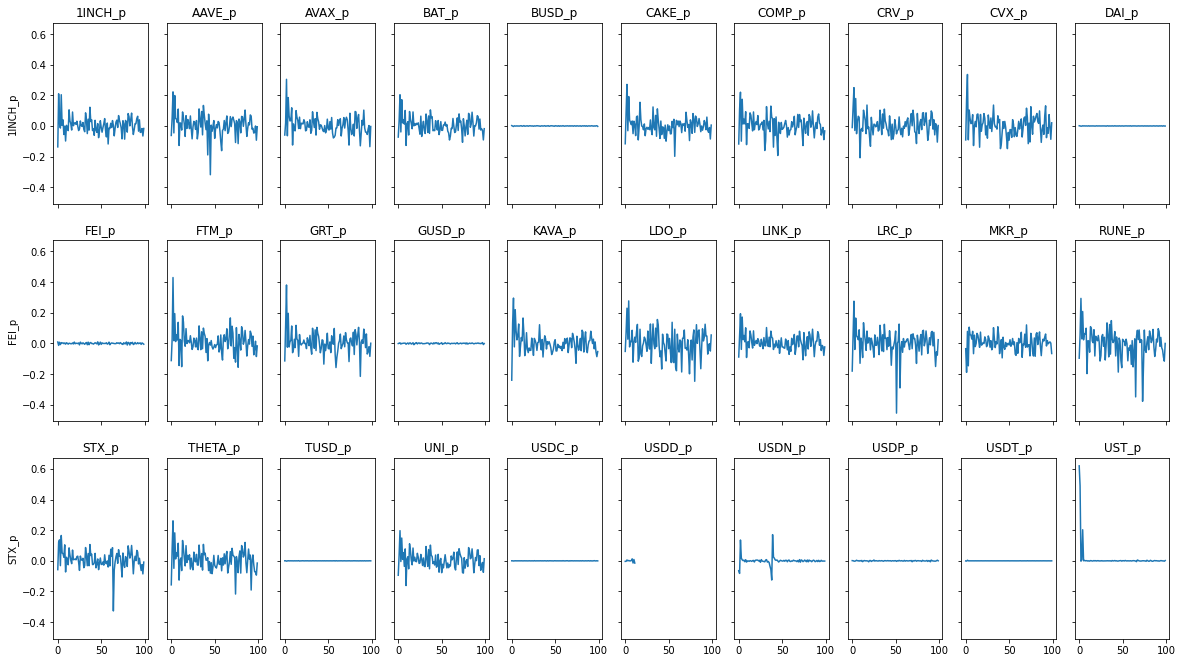

In [10]:
list_length = X_df_filtered.shape[1]
ncols = 10
nrows = int(round(list_length / ncols, 0))
height = list_length / 3 if list_length > 30 else 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = True, figsize = (20, height))

for i, ax in enumerate(fig.axes):
    if i < list_length:
        sns.lineplot(data = X_df_filtered, x = X_df_filtered.index, y = X_df_filtered.iloc[:, i], ax = ax)
        ax.set_title(X_df_filtered.columns[i])
plt.show()

In [11]:
X_df = pd.DataFrame(np.array(X_df_filtered)).dropna()

X = X_df.copy()

X /= X.std(axis = 0)
X = np.array(X)

edge_model = covariance.GraphicalLassoCV()

edge_model.fit(X)
cluster_centers_indices, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=1)
cluster_dict = {}
n_labels = labels.max()
print(f"{n_labels} Clusters")
for i in range(n_labels + 1):
    clusters = ", ".join(names[labels == i])
    print('Cluster %i: %s' % ((i + 1), clusters))
    cluster_dict[i] = (clusters)

6 Clusters
Cluster 1: 1inch, Aave, Avalanche, Basic Attention Token, Pancake Swap, Compound, CurveDao, Convex Finance, Fantom, The Graph, Gemini USD, Kava, Lido DAO, ChainLink, Loopring, ThorChain, Stacks, Theta Network, Uniswap, Wrapped BTC, Tezos, Yearn Finance, 0x
Cluster 2: Fei USD, Maker
Cluster 3: Binance USD, DAI Maker, TrueUSD, USD Coin(base)
Cluster 4: USDD
Cluster 5: Neutrino USD, Tether
Cluster 6: PAX Dollar
Cluster 7: TERRA
